<a href="https://colab.research.google.com/github/monicafar147/regression-predict-api-template/blob/Monique1/Zindi_challenge_ct_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   make sure you are working in your own branch that you cloned from git
*   to commit your notebook changes to git:
1.   file
2.   save a copy in github
3.   choose your branch from branches dropdown
4.   change commit message to what you did e.g. "fixed dataframe indexes"
5.   click ok





# Introduction to problem and dataset

## Problems to fix

* Since most of the time columns take place within 1-2 hours, the current solution of only extracting the hours is poor. Perhaps, since the y-variable is in seconds, we can convert all the time columns to something like "seconds after midnight"
* There are `Time from Pickup to Arrival` values of 1, which seems unrealistic considering the data is measured in seconds. We should investigate the actual difference between the `Arrival at Destination - Time` and `Pickup - Time` columns before we drop the `Arrival at Destination - Time` column.
* We still haven't got a solution for the `Rider Id` column to turn it into a categorical variable.

##Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Making it pretty :)
sns.set(palette='pastel')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing the dataset

In [0]:
df_train = pd.read_csv('Train.csv')
df_riders = pd.read_csv('Riders.csv')
test = pd.read_csv('Test.csv')

In [0]:
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
print('Test columns:\n', test.columns)
print('Train columns:\n', df_train.columns)

Test columns:
 Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')
Train columns:
 Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day

When comparing the columns in the train data versus the test data, we notice that there are three missing columns (aside from the dependent variable `Time from Pickup to Arrival`). 
* `Arrival at Destination - Day of Month`
* `Arrival at Destination - Weekday (Mo = 1)`
* `Arrival at Destination - Time'`

These columns are missing from the test data because they are related to the variable that needs to be predicted. These columns can, therefore, be dropped from the training dataset because they are inherently a part of `Time from Pickup to Arrival`.

In [0]:
df_train.drop(columns=['Arrival at Destination - Day of Month',
                       'Arrival at Destination - Weekday (Mo = 1)',
                       'Arrival at Destination - Time'], inplace = True)

In [0]:
df_train.shape

(21201, 26)

At this stage, we notice that there are missing values from `Temperature` and `Precipitation in millimeters`. We also need to convert all the columns that contain time information from objects to a datetime format.

# Exploratory Data Analysis

To first get well-acquainted with the data, we will first explore any obvious relationships between variables.

In [0]:
df_train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              21201 non-null  object 
 1   User Id                               21201 non-null  object 
 2   Vehicle Type                          21201 non-null  object 
 3   Platform Type                         21201 non-null  int64  
 4   Personal or Business                  21201 non-null  object 
 5   Placement - Day of Month              21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 7   Placement - Time                      21201 non-null  object 
 8   Confirmation - Day of Month           21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 10  Confirmation - Time                   21201 non-null  object 
 11  Arrival at Pick

## ECDF Plots for Distance and Delivery Times

Text(0.5, 1.0, 'ECDF Plot for Delivery Time')

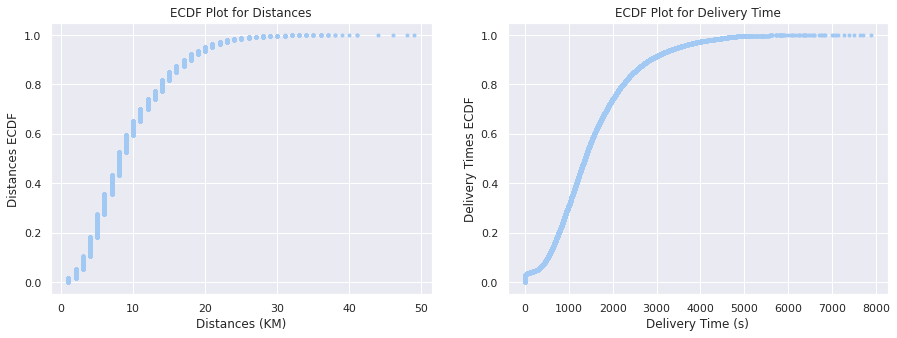

In [0]:
distances = np.sort(df_train['Distance (KM)'])
distances_ecdf = np.arange(1, len(distances) + 1) / len(distances)
delivery_times = np.sort(df_train['Time from Pickup to Arrival'])
delivery_times_ecdf = np.arange(1, len(delivery_times) + 1) / len(delivery_times)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(distances, distances_ecdf, marker='.', linestyle='none')
ax1.set_xlabel('Distances (KM)')
ax1.set_ylabel('Distances ECDF')
ax1.set_title('ECDF Plot for Distances')

ax2.plot(delivery_times, delivery_times_ecdf, marker='.', linestyle='none')
ax2.set_xlabel('Delivery Time (s)')
ax2.set_ylabel('Delivery Times ECDF')
ax2.set_title('ECDF Plot for Delivery Time')

We can see that 60 and 95 percent of deliveries are within 10KM and 20KM respectively.


With the time distributions we see that 60 and 95 percent of the delivery times are within approximately 1500(s) and 3000(s)

Based on the above distrubutions it would be interesting to build a simple Linear Regression model using only the Distance feature in our model.

### Exploring Day of Month columns

By just eyeing the first few rows of the data, it seems that the order might tend to be picked up on the same day that the order was placed. 

In [0]:
# Creating a column that calculates the difference between when the
# order was made and when the order was picked up
df_train['placement_pickup'] = df_train['Pickup - Day of Month'] - df_train['Placement - Day of Month']
print(df_train[df_train['placement_pickup'] > 0])

           Order No  ... placement_pickup
4024  Order_No_2800  ...                1
9804  Order_No_3530  ...                2

[2 rows x 27 columns]


In [0]:
df_train.drop(['placement_pickup'], axis=1, inplace=True)

It seems that there have only been two cases when the order was made and picked up on different days (and the difference was only one or two days). Out of 16291 rows of data, this data seems that it will have minor predictive capabilities.

It can therefore be suggested that we drop all but one of the columns which indicate the day of the month and day of the week, because they contain repetitive, redundant data.

In [0]:
# There are some entries where the time from pickup to arrival is too short
# to be real - need to fix

df_train[df_train['Time from Pickup to Arrival'] < 60].shape

(740, 26)

### Exploring distributions of data

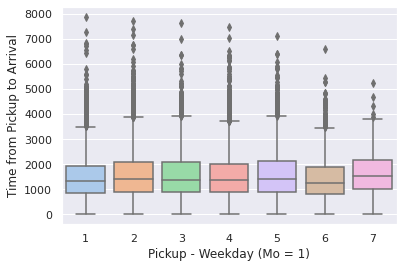

In [39]:
sns.boxplot(x='Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival', data=df_train)

These boxplots, which each represent the days of the week, indicate that there doesn't seem to be a huge difference in travel time between the different days of the week. There are fewer and less extreme outliers on weekends - especially Sundays - perhaps because there is less traffic because people aren't going to work?

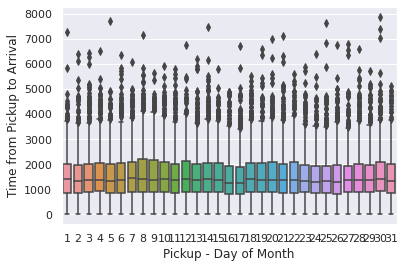

In [41]:
sns.boxplot(x='Pickup - Day of Month', y='Time from Pickup to Arrival', data=df_train)

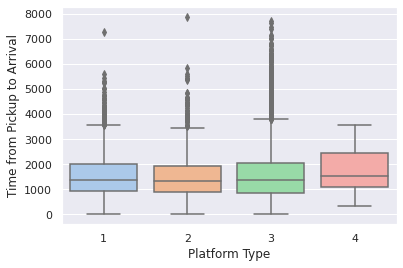

In [36]:
sns.boxplot(x='Platform Type', y='Time from Pickup to Arrival', data = df_train)

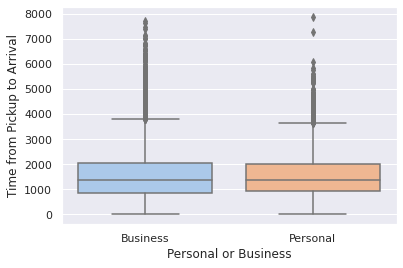

In [40]:
sns.boxplot(x='Personal or Business', y='Time from Pickup to Arrival', data=df_train)

# Data Preprocessing

## Dealing with missing values

As described above, there are null-values present in the `Temperature` and `Precipitation in millimeters` columns.

We would be able to fill the missing `Temperature` values with values from the same dates where measurements were taken, but we don't know the actual date of each measurement. The easiest option would be to fill the missing values with the average of the column, but we should find a better way of doing this.

We are assuming that if `Precipitation in millimeters` is missing, that it was not raining on that day. We can therefore fill null values with 0.

In [0]:
# Fill missing precipitation values with 0
df_train['Precipitation in millimeters'] = df_train['Precipitation in millimeters'].fillna(value=0)

# Fill missing temperature values with averages
df_train['Temperature'] = df_train['Temperature'].fillna(df_train['Temperature'].mean())

## Fixing data types

The various columns that represent a time of day need to be converted to a datetime format.

In [0]:
df_train['Placement - Time'] = pd.to_datetime(df_train['Placement - Time']).dt.time
df_train['Confirmation - Time'] = pd.to_datetime(df_train['Confirmation - Time']).dt.time
df_train['Arrival at Pickup - Time'] = pd.to_datetime(df_train['Arrival at Pickup - Time']).dt.time
df_train['Pickup - Time'] = pd.to_datetime(df_train['Pickup - Time']).dt.time

## Dropping columns

In [0]:
df_train['Vehicle Type'].unique()

array(['Bike'], dtype=object)

The `Vehicle Type` column only contains one value - Bike. This is redundant info, therefore we can drop this column.

In [0]:
# Reason for dropping various day columns is discussed above

df_train.drop(['Vehicle Type', 'Placement - Day of Month',
               'Placement - Weekday (Mo = 1)',
               'Confirmation - Day of Month',
               'Confirmation - Weekday (Mo = 1)',
               'Arrival at Pickup - Day of Month',
               'Arrival at Pickup - Weekday (Mo = 1)'], axis=1,
              inplace = True)

## Merge Train.csv with Riders.csv

In [0]:
merged_df = df_train.merge(df_riders, on='Rider Id')
merged_df.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,09:35:46,09:40:10,10:04:47,9,5,10:27:30,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,15:41:17,15:41:30,16:07:16,18,5,16:13:37,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,12:51:41,13:12:49,13:20:02,31,5,13:33:08,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,07:12:10,07:12:29,07:35:24,2,2,07:38:46,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,10:40:58,10:42:24,10:56:00,22,2,10:59:40,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


## IDs

This is definitely only a TEMPORARY "solution" 

In [0]:
# Function to return only number part of string
def number_only(id):
  return id.split('_')[-1]

In [0]:
merged_df['Order No'] = merged_df['Order No'].apply(number_only)
merged_df['User Id'] = merged_df['User Id'].apply(number_only)
merged_df['Rider Id'] = merged_df['Rider Id'].apply(number_only)

## Encoding data

### One-hot encoding for categorical data

In [0]:
merged_df = pd.get_dummies(merged_df, columns=['Platform Type', 'Personal or Business'],
                           prefix=['platformtype', 'personalbusiness'])

Until we have a better idea, I've split the time data into hours (the deliveries are often within the same hour or two so this is definitely a poor option)

Time columns: 

*   `Placement - Time`
*   `Confirmation - Time`
*   `Arrival at Pickup - Time`
*   `Pickup - Time`

In [0]:
# Function to get only the hour from each time variable
def get_hour(col):
  return col.hour

In [0]:
merged_df['Placement_hour'] = merged_df['Placement - Time'].apply(get_hour)
merged_df['Confirmation_hour'] = merged_df['Confirmation - Time'].apply(get_hour)
merged_df['Arrival_pickup_hour'] = merged_df['Arrival at Pickup - Time'].apply(get_hour)
merged_df['Pickup_hour'] = merged_df['Pickup - Time'].apply(get_hour)

# Drop original time columns
merged_df.drop(columns=['Placement - Time', 'Confirmation - Time',
                'Arrival at Pickup - Time', 'Pickup - Time'], inplace = True)

In [0]:
merged_df.head()

,Order No,User Id,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,platformtype_1,platformtype_2,platformtype_3,platformtype_4,personalbusiness_Business,personalbusiness_Personal,Placement_hour,Confirmation_hour,Arrival_pickup_hour,Pickup_hour
0,4211,633,9,5,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,432,745,1637,1309,13.8,549,0,0,1,0,1,0,9,9,10,10
1,27440,2642,18,5,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,432,2886,1637,1309,13.8,549,0,0,1,0,0,1,15,15,16,16
2,14170,3339,31,5,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,432,2615,1637,1309,13.8,549,0,0,1,0,1,0,12,13,13,13
3,21727,3523,2,2,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,432,2986,1637,1309,13.8,549,0,0,1,0,0,1,7,7,7,7
4,8301,87,22,2,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,432,1602,1637,1309,13.8,549,0,1,0,0,0,1,10,10,10,10


## Correlations

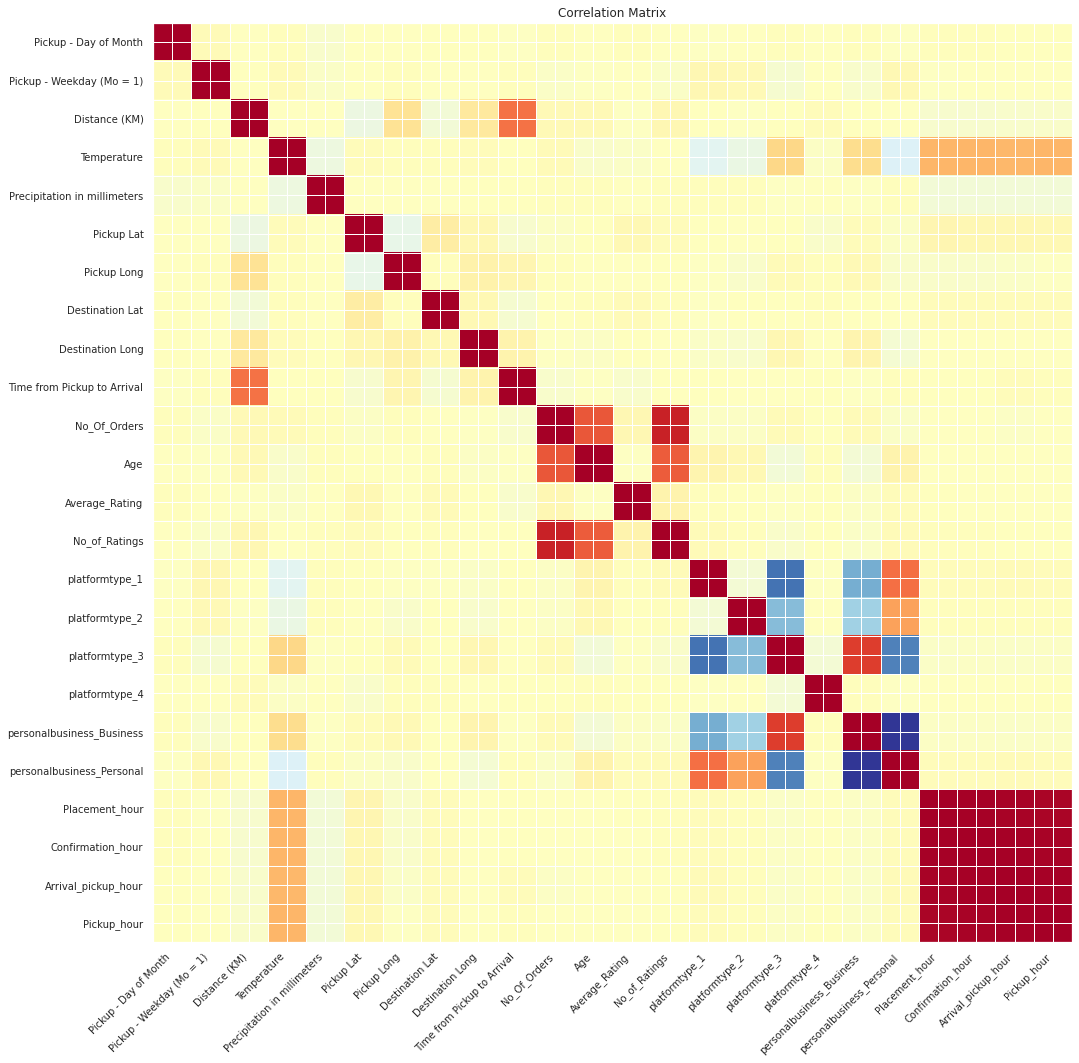

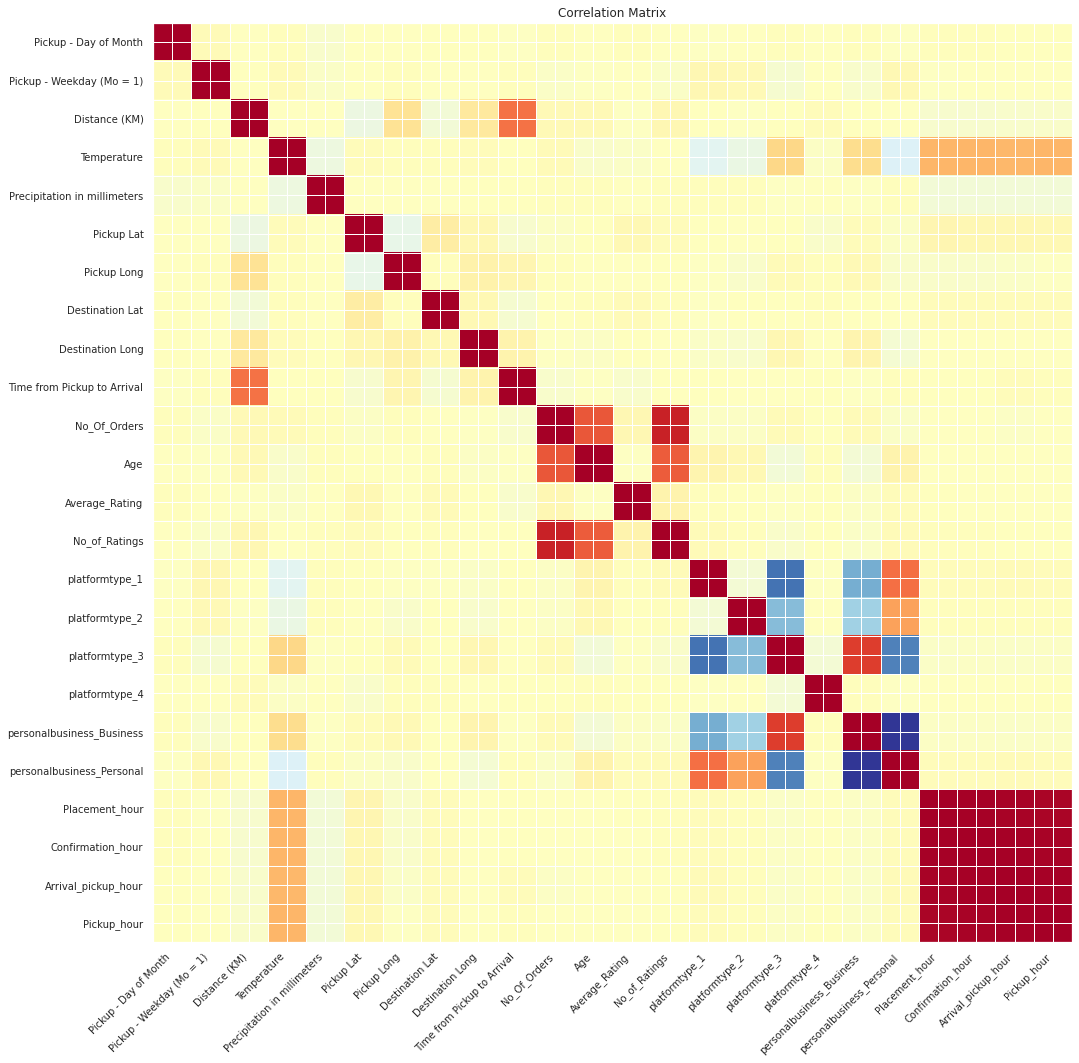

In [0]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plot_corr(merged_df.corr(), xnames = merged_df.corr().columns, ax=ax)

We can see here that the hourly solution for the time columns is poor and needs improvement.

# Multiple Linear Regression

In [0]:
# Reorder columns so that dependent variable is the last column of the dataframe
column_titles = [col for col in merged_df.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
merged_df = merged_df.reindex(columns=column_titles)

X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]

In [0]:
# Import LinearRegression module and create object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit a linear regression model
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Inspecting coefficients to better understand  their influence
beta_0 = float(lm.intercept_)

# Extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

print("Intercept: ", beta_0)

Intercept:  45125.09644308635


In [0]:
beta_js

,Coefficient
Order No,-0.001559
User Id,0.010080
Pickup - Day of Month,-0.866088
Pickup - Weekday (Mo = 1),4.816025
Distance (KM),102.988380
Temperature,1.215493
Precipitation in millimeters,2.841832
Pickup Lat,293.798251
Pickup Long,-1003.648703
Destination Lat,-478.693498


## Assessing model accuracy

In [0]:
from sklearn import metrics
import math

print("Training MSE:", metrics.mean_squared_error(y, lm.predict(X)))

Training MSE: 627231.0546426157


# LASSO Regression

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

lasso_int = float(lasso.intercept_)
lasso_coeff = pd.DataFrame(lasso.coef_, X.columns, columns = ['Coefficient'])
print('Intercept: ', float(lasso_int))

Intercept:  44792.14735688985


In [0]:
lasso_coeff

,Coefficient
Order No,-1.559925e-03
User Id,1.010511e-02
Pickup - Day of Month,-8.661795e-01
Pickup - Weekday (Mo = 1),4.811773e+00
Distance (KM),1.029715e+02
Temperature,1.213333e+00
Precipitation in millimeters,2.840634e+00
Pickup Lat,2.821767e+02
Pickup Long,-9.980954e+02
Destination Lat,-4.700542e+02


In [0]:
# Make training set predictions
print('Training MSE: ', metrics.mean_squared_error(y, lasso.predict(X)))

Training MSE:  627231.4731224688


#Dunyiswa

#Monica

#Monique

#Rachel

#Wright